In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Aspectos que me gustaria explorar: 

# 1. Que tipos de producto han sido mas exitoso en terminos de porcentajes vendidos?
# 2. Que tipo de productos han traido la mayor cantidad de ingresos?
# 3. Que factores influyen en los procentajes y numeros de venta? 

# Desarrollo

## Importar datos

In [2]:
df = pd.read_csv("Desafio ds 2022/ofertas_relampago.csv")

## Algunas manipulaciones y visualizaciones iniciales

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48746 entries, 0 to 48745
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OFFER_START_DATE           48746 non-null  object 
 1   OFFER_START_DTTM           48746 non-null  object 
 2   OFFER_FINISH_DTTM          48746 non-null  object 
 3   OFFER_TYPE                 48746 non-null  object 
 4   INVOLVED_STOCK             48746 non-null  int64  
 5   REMAINING_STOCK_AFTER_END  48746 non-null  int64  
 6   SOLD_AMOUNT                24579 non-null  float64
 7   SOLD_QUANTITY              24579 non-null  float64
 8   ORIGIN                     11316 non-null  object 
 9   SHIPPING_PAYMENT_TYPE      48746 non-null  object 
 10  DOM_DOMAIN_AGG1            48746 non-null  object 
 11  VERTICAL                   48746 non-null  object 
 12  DOMAIN_ID                  48746 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usag

In [5]:
df.head()

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,MLM-SPEAKERS
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES


### Inspeccionando estas tablas ya puedo observar dos cosas: hay items para los cuales se vendieron mas unidades que las que se tenian inicialmente, y hay items para los cuales no ha habido ventas y el SOLD_AMOUNT es ingresado como NaN

In [6]:
print(df.isnull().sum())

OFFER_START_DATE                 0
OFFER_START_DTTM                 0
OFFER_FINISH_DTTM                0
OFFER_TYPE                       0
INVOLVED_STOCK                   0
REMAINING_STOCK_AFTER_END        0
SOLD_AMOUNT                  24167
SOLD_QUANTITY                24167
ORIGIN                       37430
SHIPPING_PAYMENT_TYPE            0
DOM_DOMAIN_AGG1                  0
VERTICAL                         0
DOMAIN_ID                        0
dtype: int64


### Las columnas de SOLD_AMOUNT y SOLD_QUANTITY tienen la misma cantidad de datos nulos, lo cual tiene sentido. La columna de ORIGIN tambien posee datos nulos. Si inspeccionamos valores unicos de esa columna encontramos:

In [7]:
df['ORIGIN'].unique()

array(['A', nan], dtype=object)

### Vemos entonces que solo hay dos valores, 'A' y NaN. Uno podria remover estos valores, o reemplazar los NaN por ceros. Hagamos lo segundo. Lo mismo para las columnas SOLD_AMOUNT Y SOLD QUANTITY.

In [8]:
df.fillna(0,inplace=True)

### Tambien es importante que busquemos por data entries duplicadas.

In [29]:
df.duplicated().sum()

926

### En efecto, vemos que hay entradas duplicadas, corrigamos eso.

In [45]:
df.drop_duplicates(subset=None, keep='first', inplace=True)
df.duplicated().sum()

0

### Ahora creemos una nueva columna que corresponda con el porcentaje vendido de items. En caso de que vendamos mas del stock inicial, tendremos algo arriba de 100%.

In [33]:
df['PERCENTAGE_SOLD'] =df['SOLD_QUANTITY']*100/df['INVOLVED_STOCK']

### Agreguemos tambien la duracion de la oferta como otra variable

In [34]:
df['OFFER_START_DTTM'] = pd.to_datetime(df.OFFER_START_DTTM)
df['OFFER_FINISH_DTTM'] = pd.to_datetime(df.OFFER_FINISH_DTTM)
df['OFFER_DURATION']=(df.OFFER_FINISH_DTTM-df.OFFER_START_DTTM).dt.seconds

## Empecemos a hacer preguntas

### Podemos dar un vistazo a un summary de la data que podria darnos informacion interesante.

In [46]:
df.describe()

,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,PERCENTAGE_SOLD,OFFER_DURATION
count,47820.000000,47820.000000,47820.000000,47820.000000,47820.000000,47820.000000
mean,35.153095,30.641029,26.271502,5.575638,21.065191,20521.037077
std,208.339376,197.270692,128.189295,33.050404,35.543111,7393.677379
min,1.000000,-192.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,4.000000,0.000000,0.000000,0.000000,21600.000000
50%,10.000000,8.000000,1.490000,1.000000,2.222222,21602.000000
75%,15.000000,15.000000,12.840000,3.000000,26.666667,21610.000000
max,9000.000000,8635.000000,4836.570000,1646.000000,1380.000000,56229.000000


### Con esta rapida y simple tabla podemos aprender por ejemplo que 50% de los poductos solo han vendido un 2% de su stock, y que 75% de las ofertas consisten en 15 o menos unidades comprometidas.

### Comencemos un analisis mas profundo. Primero, tratemos de analizar los datos desde el punto de vista del tipo de producto. Podemos contar las clases de productos que fueron ofertados.

In [36]:
(df.DOMAIN_ID).value_counts()

MLM-SURGICAL_AND_INDUSTRIAL_MASKS    1757
MLM-HEADPHONES                        750
MLM-LED_STRIPS                        512
MLM-SUNGLASSES                        455
MLM-VEHICLE_LED_BULBS                 454
                                     ... 
MLM-DRILL_CHUCKS                        1
MLM-DINING_TABLES                       1
MLM-TOY_DRUMS                           1
MLM-PARTY_SUPPLY_KITS                   1
MLM-ELECTRIC_SANDWICH_MAKERS            1
Name: DOMAIN_ID, Length: 1266, dtype: int64

### El tipo de producto mas ofertado son barbijos y mascaras (lo cual tiene sentido por la pandemia). En cuanto a monto vendido, cuales han sido los productos que mas ingresos han traido?

In [37]:
tot_vent = df.SOLD_AMOUNT.sum()
tot_vent

1256303.2399999998

In [38]:
df_item_ventas= (df[['DOMAIN_ID','SOLD_AMOUNT']].groupby('DOMAIN_ID').sum()).sort_values('SOLD_AMOUNT',ascending = False)
df_item_ventas[:10]

,SOLD_AMOUNT
DOMAIN_ID,
MLM-SURGICAL_AND_INDUSTRIAL_MASKS,410363.30
MLM-CELLPHONES,111201.81
MLM-TELEVISIONS,65848.41
MLM-DISPOSABLE_GLOVES,55365.39
MLM-HEADPHONES,29570.35
MLM-SMARTWATCHES,21492.10
MLM-TABLETS,19123.19
MLM-OXIMETERS,17606.61
MLM-NOTEBOOKS,16804.86


### En terminos de ingresos, las mascaras han vendido mas. Items electronicos (que son tipicamente mas caros) tambien aparecen a la cabecera de ventas. Los guantes descartables, notablemente arriba, tambien reflejan la demanda de items sanitarios por la pandemia. 

### Ahora, la cantidad de dinero entrante por un tipo de producto no nos dice realmente cuan efectiva ha sido la oferta. Por ejemplo, imaginense ofrecer 1000 zapatillas a 10 millones de pesos el par. Si una sola persona compra, hay un ingreso de 10 millones de pesos, pero la mayor parte del stock quedo sin vender. 

### El procentaje de items vendidos tampoco es por si solo un buen indicador de efectividad de la oferta. Si tengo un item con una sola oferta y un solo comprador, he vendido el 100% de la oferta. 

### Algo que podria hacer es enfocarme en aquellos productos que tuvieron un stock inicial arriba de cierto treshold, y analizar el procentaje de unidades que vendieron durante las ofertas. 

In [39]:
df_item_stock= (df[['DOMAIN_ID','INVOLVED_STOCK']].groupby('DOMAIN_ID').sum()).sort_values('INVOLVED_STOCK',ascending = False)
df_item_stock

,INVOLVED_STOCK
DOMAIN_ID,
MLM-SURGICAL_AND_INDUSTRIAL_MASKS,651780
MLM-OXIMETERS,116024
MLM-DISPOSABLE_GLOVES,44825
MLM-CELLPHONES,44809
MLM-THERMOMETERS,34056
...,...
MLM-LIP_BALMS,2
MLM-GLASS_SAFETY_FILMS,1
MLM-DOLL_AND_ACTION_FIGURE_SETS,1


### Elijamos un treshold de stock inicial .

In [40]:
#Consideremos productos con un stock inicial mayor a 2000
thresh = 2000
Inx_thresh = df_item_stock.INVOLVED_STOCK.loc[df_item_stock.INVOLVED_STOCK>thresh].index
Inx_thresh

Index(['MLM-SURGICAL_AND_INDUSTRIAL_MASKS', 'MLM-OXIMETERS',
       'MLM-DISPOSABLE_GLOVES', 'MLM-CELLPHONES', 'MLM-THERMOMETERS',
       'MLM-T_SHIRTS', 'MLM-HEADPHONES', 'MLM-TELEVISIONS', 'MLM-PANTS',
       'MLM-SMARTWATCHES',
       ...
       'MLM-CATS_AND_DOGS_FOODS', 'MLM-BABY_STROLLERS', 'MLM-SUPPLEMENTS',
       'MLM-DECORATIVE_VINYLS', 'MLM-SPORT_SHORTS',
       'MLM-BODY_SKIN_CARE_PRODUCTS', 'MLM-MOTORCYCLE_HELMETS', 'MLM-FOOTWEAR',
       'MLM-SAFETY_FOOTWEAR', 'MLM-BRACELETS_AND_ANKLE_BRACES'],
      dtype='object', name='DOMAIN_ID', length=115)

In [41]:
df_item_stock.loc[Inx_thresh.to_list()]

,INVOLVED_STOCK
DOMAIN_ID,
MLM-SURGICAL_AND_INDUSTRIAL_MASKS,651780
MLM-OXIMETERS,116024
MLM-DISPOSABLE_GLOVES,44825
MLM-CELLPHONES,44809
MLM-THERMOMETERS,34056
...,...
MLM-BODY_SKIN_CARE_PRODUCTS,2085
MLM-MOTORCYCLE_HELMETS,2085
MLM-FOOTWEAR,2079


### Bien, ya conocemos los tipos de productos que comenzaron con un stock arriba de 2000 unidades. Son 115 entre los 1266 tipos de productos iniciales. 

### Cuales son los tipos de items (con stock inicial >thresh) con mayor procentaje de ventas? Veamos el promedio de porcentaje de ventas por tipo de producto

In [42]:
df_perc = ((df[['DOMAIN_ID','PERCENTAGE_SOLD']].set_index('DOMAIN_ID').loc[Inx_thresh.to_list()]).groupby('DOMAIN_ID').mean()).sort_values('PERCENTAGE_SOLD',ascending = False)
df_perc[:20]

,PERCENTAGE_SOLD
DOMAIN_ID,
MLM-CATS_AND_DOGS_FOODS,49.099769
MLM-LIGHT_BULBS,47.363105
MLM-SURGICAL_AND_INDUSTRIAL_MASKS,46.840235
MLM-CHRISTMAS_LIGHTS,44.616228
MLM-DISPOSABLE_GLOVES,41.388867
MLM-HEADPHONES,36.581118
MLM-AUTOMOTIVE_LED_LIGHT_BARS,36.125828
MLM-BODYWEIGHT_SCALES,32.604876
MLM-WALL_AND_CEILING_LIGHTS,32.472306


### Vemos que, de los productos que se venden con un stock inicial mayor a 2000 unidades, estos son los productos que tienen un mayor porcentaje de ventas. Comparando con los productos que dan el top 10 de ingresos:

In [43]:
df_item_ventas[:10]

,SOLD_AMOUNT
DOMAIN_ID,
MLM-SURGICAL_AND_INDUSTRIAL_MASKS,410363.30
MLM-CELLPHONES,111201.81
MLM-TELEVISIONS,65848.41
MLM-DISPOSABLE_GLOVES,55365.39
MLM-HEADPHONES,29570.35
MLM-SMARTWATCHES,21492.10
MLM-TABLETS,19123.19
MLM-OXIMETERS,17606.61
MLM-NOTEBOOKS,16804.86


### Vemos que las mascaras, los guantes descartables y los headphones son productos que se ofertan bien y proveen ingresos considerables.

### Podriamos tambien investigar cuales son los tipos de productos que han sido menos exitosos en sus ventas.

In [44]:
df_perc[-20:]

,PERCENTAGE_SOLD
DOMAIN_ID,
MLM-KEYCHAINS,9.678137
MLM-KITCHEN_MOLDS,9.666237
MLM-MUGS,9.241344
MLM-DRESSES,9.049918
MLM-DOLLS,7.919350
MLM-TABLETS,7.465182
MLM-TELEVISIONS,7.080224
MLM-MEASURING_CUPS_AND_JUGS,6.788418
MLM-DINING_CHAIRS,6.551298


### Interesante! Vemos el ejemplo de las televisiones, notebooks y tablets, que si bien han contribuido a los ingresos considerablemente, no se han vendido bien en termino de porcentajes.

# Bien ahora quiero ver otros detalles que pueden ser interesantes

## Tipo de shipping podria ser influyente

In [22]:
df['SHIPPING_PAYMENT_TYPE'].unique()

array(['none', 'free_shipping'], dtype=object)

## Grafiquemos para ver si free_shipping tiene alguna tendencia interesante

### Veamos si podemos usar escala logaritmica tambien (veamos si hay ceros o valores negativos en algun lado primero) 

In [23]:
def f1(x):
    return np.log10(x)

In [24]:
df_log = df[df['SOLD_AMOUNT']>0].copy(deep=True) 

In [25]:
df_log['INVOLVED_STOCK'] = df_log['INVOLVED_STOCK'].apply(f1)
df_log['SOLD_AMOUNT'] = df_log['SOLD_AMOUNT'].apply(f1)
df_log['SOLD_QUANTITY'] = df_log['SOLD_QUANTITY'].apply(f1)
df_log['PERCENTAGE_SOLD'] = df_log['PERCENTAGE_SOLD'].apply(f1)

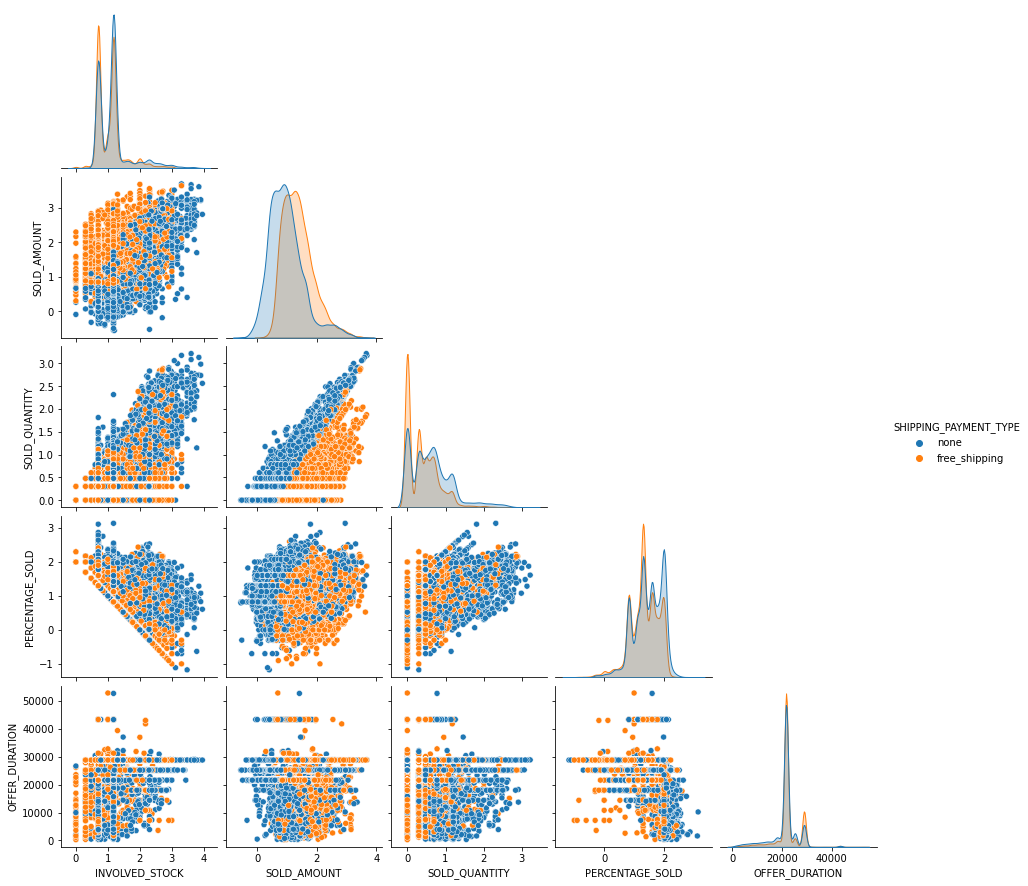

In [26]:
gr_log = sns.pairplot(df_log[['INVOLVED_STOCK','SOLD_AMOUNT','SOLD_QUANTITY','PERCENTAGE_SOLD','OFFER_DURATION','SHIPPING_PAYMENT_TYPE']], hue = 'SHIPPING_PAYMENT_TYPE',corner = True)

### Recordando que estamos graficando en escalas logaritmicas, vemos que no hay una diferencia grande entre las ventas con free shipping o sin free shipping. Hay un leve aumento en SOLD_AMOUNT pero no llega a un orden de magnitud.

## Otro factor interesante a investigar es el numero de items vendidos en funcion del dia de la semana y hora del dia

In [27]:
df_days = df.copy(deep=True) 
df_days['OFFER_FINISH_DTTM'] = df['OFFER_FINISH_DTTM'].dt.weekday
df_days_ventas= (df_days[['OFFER_FINISH_DTTM','SOLD_QUANTITY']].groupby('OFFER_FINISH_DTTM').sum()).sort_values('SOLD_QUANTITY',ascending = False)
df_days_ventas

,SOLD_QUANTITY
OFFER_FINISH_DTTM,
1,50470.0
2,44354.0
3,41273.0
0,41103.0
4,38238.0
5,30815.0
6,20455.0


### La gente comrpa mas en la primera mitad de la semana

In [28]:
df_hours = df.copy(deep=True) 
df_hours['OFFER_FINISH_DTTM'] = df['OFFER_FINISH_DTTM'].dt.hour
df_hours= (df_hours[['OFFER_FINISH_DTTM','SOLD_QUANTITY']].groupby('OFFER_FINISH_DTTM').sum()).sort_values('SOLD_QUANTITY',ascending = False)
df_hours

,SOLD_QUANTITY
OFFER_FINISH_DTTM,
20,51691.0
19,40309.0
18,26089.0
1,24493.0
21,21361.0
22,19806.0
23,17691.0
17,15887.0
13,13958.0


### La gente compra mas durante la tarde-noche 18-23 ( cuando no esta trabajando o durmiendo) 

### Inicialmente, estaba interesado en investigar el stock inicial y la duracion de la oferta tienen algun efecto en el porcentaje de ventas (desde un punto de vista psicologico, tal vez la gente quiere comprar ofertas escasas y que son oportunidades del momento)

<AxesSubplot:>

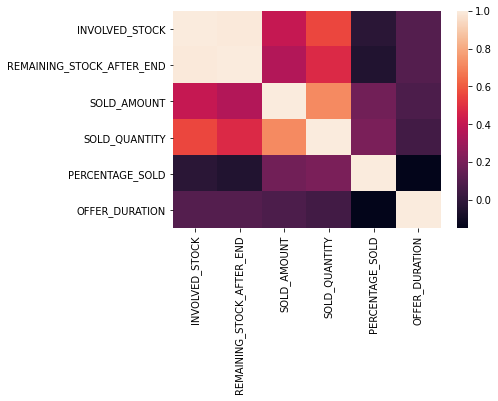

In [47]:
sns.heatmap(df.corr())

### Con este grafico podemos corroborar que no pareciera haber una correlacion importante entre el porcentaje de venta y la duracion de la oferta o el stock inicial. Con respecto a la duracion de la oferta, este resultado tiene sentido, porque pareciera que la duracion es seteada a 6 horas mayoritariamente y posiblemente a priori, volviendola una variable mas independiente.